# Lead Score - Case Study

## Problem Statement
An X Education need help to select the most promising leads, i.e. the leads that are most likely to convert into paying customers. The company requires us to build a model wherein you need to assign a lead score to each of the leads such that the customers with higher lead score have a higher conversion chance and the customers with lower lead score have a lower conversion chance. The CEO, in particular, has given a ballpark of the target lead conversion rate to be around 80%. <br>

The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. When these people fill up a form providing their email address or phone number, they are classified to be a lead. Moreover, the company also gets leads through past referrals. Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%.

Now, although X Education gets a lot of leads, its lead conversion rate is very poor. For example, if, say, they acquire 100 leads in a day, only about 30 of them are converted. To make this process more efficient, the company wishes to identify the most potential leads, also known as ‘Hot Leads’. If they successfully identify this set of leads, the lead conversion rate should go up as the sales team will now be focusing more on communicating with the potential leads rather than making calls to everyonelage

## Goals and Objectives
There are quite a few goals for this case study.
- Build a logistic regression model to assign a lead score between 0 and 100 to each of the leads which can be used by the company to target potential leads. A higher score would mean that the lead is hot, i.e. is most likely to convert whereas a lower score would mean that the lead is cold and will mostly not get converted.
- There are some more problems presented by the company which your model should be able to adjust to if the company's requirement changes in the future so you will need to handle these as well. These problems are provided in a separate doc file. Please fill it based on the logistic regression model you got in the first step. Also, make sure you include this in your final PPT where you'll make recommendations.

___All the outcomes and understandings are written in <font color= green> GREEN</font>___

In [1]:
# Supress Warnings
import warnings
warnings.filterwarnings('ignore')
#Importing required packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 1 : Loading and Cleaning Data

##  1.1  Import Data 

In [2]:
# Loading the data using Pandas
df = pd.read_csv(r"C:\Users\Abhishek Goel\Downloads\IIITB\Lead+Scoring+Case+Study\Lead Scoring Assignment\Leads.csv")
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


## 1.2 Inspect the dataframe
This helps to give a good idea of the dataframes.

In [3]:
# The .info() code gives almost the entire information that needs to be inspected, so let's start from there
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [4]:
#To get the idea of how the table looks like we can use .head() or .tail() command
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [5]:
# The .shape code gives the no. of rows and columns
df.shape

(9240, 37)

In [6]:
#To get an idea of the numeric values, use .describe()
df.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


## 1.3 Cleaning the dataframe

In [7]:
# Converting all the values to lower case
df = df.applymap(lambda s:s.lower() if type(s) == str else s)

In [8]:
# Get the value counts of all the columns

for col in df.columns:
    print(df[col].astype('category').value_counts())
    print('-'*50)

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
a7a319ea-b6ae-4c6b-afc5-183b933d10b5    1
aa27a0af-eeab-4007-a770-fa8a93fa53c8    1
aa30ebb2-8476-41ce-9258-37cc025110d3    1
aa405742-17ac-4c65-b19e-ab91c241cc53    1
                                       ..
539eb309-df36-4a89-ac58-6d3651393910    1
539ffa32-1be7-4fe1-b04c-faf1bab763cf    1
53aabd84-5dcc-4299-bbe3-62f3764b07b1    1
53ac14bd-2bb2-4315-a21c-94562d1b6b2d    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Number
579533    1
629593    1
630390    1
630403    1
630405    1
         ..
602534    1
602540    1
602557    1
602561    1
660737    1
Name: count, Length: 9240, dtype: int64
--------------------------------------------------
Lead Origin
landing page submission    4886
api                        3580
lead add form               718
lead import                  55
quick add form                1
Name: count, dtype: int64
--

### 1)Handling the 'Select' level that is present in many of the categorical variables.

We observe that there are 'Select' values in many columns.It may be because the customer did not select any option from the  list, hence it shows 'Select'.'Select' values are as good as NULL. So we can convert these values to null values.

In [9]:
# Replacing 'Select' with NaN (Since it means no option is selected)
df = df.replace('select',np.nan)

In [10]:
# Checking if there are columns with one unique value since it won't affect our analysis
df.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        20
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [11]:
# Dropping unique valued columns
df1= df.drop(['Magazine','Receive More Updates About Our Courses','I agree to pay the amount through cheque','Get updates on DM Content','Update me on Supply Chain Content'],axis=1)

In [12]:
# Checking the percentage of missing values
round(100*(df1.isnull().sum()/len(df1.index)), 2)

Prospect ID                                       0.00
Lead Number                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
How did you hear about X Education               78.46
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Educatio

In [13]:
# Removing all the columns that are no required and have 35% null values
df2 = df1.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
df2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,api,olark chat,no,no,0,0.0,0,0.0,page visited on website,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
1,2a272436-5132-4136-86fa-dcc88c88f482,api,organic search,no,no,0,5.0,674,2.5,email opened,...,unemployed,better career prospects,no,no,no,no,no,no,no,email opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,landing page submission,direct traffic,no,no,1,2.0,1532,2.0,email opened,...,student,better career prospects,no,no,no,no,no,no,yes,email opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,landing page submission,direct traffic,no,no,0,1.0,305,1.0,unreachable,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified
4,3256f628-e534-4826-9d63-4a8b88782852,landing page submission,google,no,no,1,2.0,1428,1.0,converted to lead,...,unemployed,better career prospects,no,no,no,no,no,no,no,modified


In [14]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                       0.00
Lead Origin                                       0.00
Lead Source                                       0.39
Do Not Email                                      0.00
Do Not Call                                       0.00
Converted                                         0.00
TotalVisits                                       1.48
Total Time Spent on Website                       0.00
Page Views Per Visit                              1.48
Last Activity                                     1.11
Country                                          26.63
Specialization                                   36.58
What is your current occupation                  29.11
What matters most to you in choosing a course    29.32
Search                                            0.00
Newspaper Article                                 0.00
X Education Forums                                0.00
Newspaper                                         0.00
Digital Ad

<font color= green>___There is a huge value of null variables in 4 columns as seen above. But removing the rows with the null value will cost us a lot of data and they might be important columns. So, instead we are going to replace the NaN values with 'not provided'. This way we have all the data and almost no null values. In case these come up in the model, it will be of no use and we can drop it off then.___</font>

In [15]:
df2['Specialization'] = df2['Specialization'].fillna('not provided') 
df2['What matters most to you in choosing a course'] = df2['What matters most to you in choosing a course'].fillna('not provided')
df2['Country'] = df2['Country'].fillna('not provided')
df2['What is your current occupation'] = df2['What is your current occupation'].fillna('not provided')
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [16]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [17]:
df2["Country"].value_counts()

Country
india                   6492
not provided            2461
united states             69
united arab emirates      53
singapore                 24
saudi arabia              21
united kingdom            15
australia                 13
qatar                     10
bahrain                    7
hong kong                  7
oman                       6
france                     6
unknown                    5
kuwait                     4
south africa               4
canada                     4
nigeria                    4
germany                    4
sweden                     3
philippines                2
uganda                     2
italy                      2
bangladesh                 2
netherlands                2
asia/pacific region        2
china                      2
belgium                    2
ghana                      2
kenya                      1
sri lanka                  1
tanzania                   1
malaysia                   1
liberia                    1
switze

In [18]:
# Categorizing data into india and outside india for better analysis

def slots(x):
    category = ""
    if x == "india":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

df2['Country'] = df2.apply(lambda x:slots(x['Country']), axis = 1)
df2['Country'].value_counts()

Country
india            6492
not provided     2461
outside india     287
Name: count, dtype: int64

In [19]:
# Rechecking the percentage of missing values
round(100*(df2.isnull().sum()/len(df2.index)), 2)

Prospect ID                                      0.00
Lead Origin                                      0.00
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                                      0.00
Converted                                        0.00
TotalVisits                                      1.48
Total Time Spent on Website                      0.00
Page Views Per Visit                             1.48
Last Activity                                    1.11
Country                                          0.00
Specialization                                   0.00
What is your current occupation                  0.00
What matters most to you in choosing a course    0.00
Search                                           0.00
Newspaper Article                                0.00
X Education Forums                               0.00
Newspaper                                        0.00
Digital Advertisement       

In [20]:
# Checking the percent of lose if the null values are removed
round(100*(sum(df2.isnull().sum(axis=1) > 1)/df2.shape[0]),2)

1.48

In [21]:
df3 = df2[df2.isnull().sum(axis=1) <1]

In [22]:
# Code for checking number of rows left in percent
round(100*(df3.shape[0])/(df.shape[0]),2)

98.2

In [23]:
# Rechecking the percentage of missing values
round(100*(df3.isnull().sum()/len(df3.index)), 2)

Prospect ID                                      0.0
Lead Origin                                      0.0
Lead Source                                      0.0
Do Not Email                                     0.0
Do Not Call                                      0.0
Converted                                        0.0
TotalVisits                                      0.0
Total Time Spent on Website                      0.0
Page Views Per Visit                             0.0
Last Activity                                    0.0
Country                                          0.0
Specialization                                   0.0
What is your current occupation                  0.0
What matters most to you in choosing a course    0.0
Search                                           0.0
Newspaper Article                                0.0
X Education Forums                               0.0
Newspaper                                        0.0
Digital Advertisement                         

In [24]:
# To familiarize all the categorical values
for column in df3:
    print(df3[column].astype('category').value_counts())
    print('----------------------------------------------------------------------------------------')

Prospect ID
000104b9-23e4-4ddc-8caa-8629fe8ad7f4    1
aa9b208a-31f7-456f-8968-beee2b2ab2c7    1
aa708f29-9cb7-4959-a251-8aff9613b024    1
aa7e4871-e2f5-4c6a-887a-040c3a7b80bb    1
aa7f5fc5-f49a-44a7-b870-e7abfbd0fe76    1
                                       ..
537963c8-22d9-459d-8aae-ddac40580ffb    1
53744d5a-0483-42c0-80b0-8990a4d2356d    1
53715ab1-2106-4c4e-8493-81cc465eb9ce    1
536cdc6b-f4c1-449d-bfd8-9ef0ac912dbb    1
fffb0e5e-9f92-4017-9f42-781a69da4154    1
Name: count, Length: 9074, dtype: int64
----------------------------------------------------------------------------------------
Lead Origin
landing page submission    4885
api                        3578
lead add form               581
lead import                  30
Name: count, dtype: int64
----------------------------------------------------------------------------------------
Lead Source
google               2873
direct traffic       2543
olark chat           1753
organic search       1154
reference             443


In [25]:

# Removing Id values since they are unique for everyone
df_final = df3.drop('Prospect ID', axis=1)
df_final.shape


(9074, 21)

## 2. EDA

### 2.1. Univariate Analysis

#### 2.1.1. Categorical Variables

In [26]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

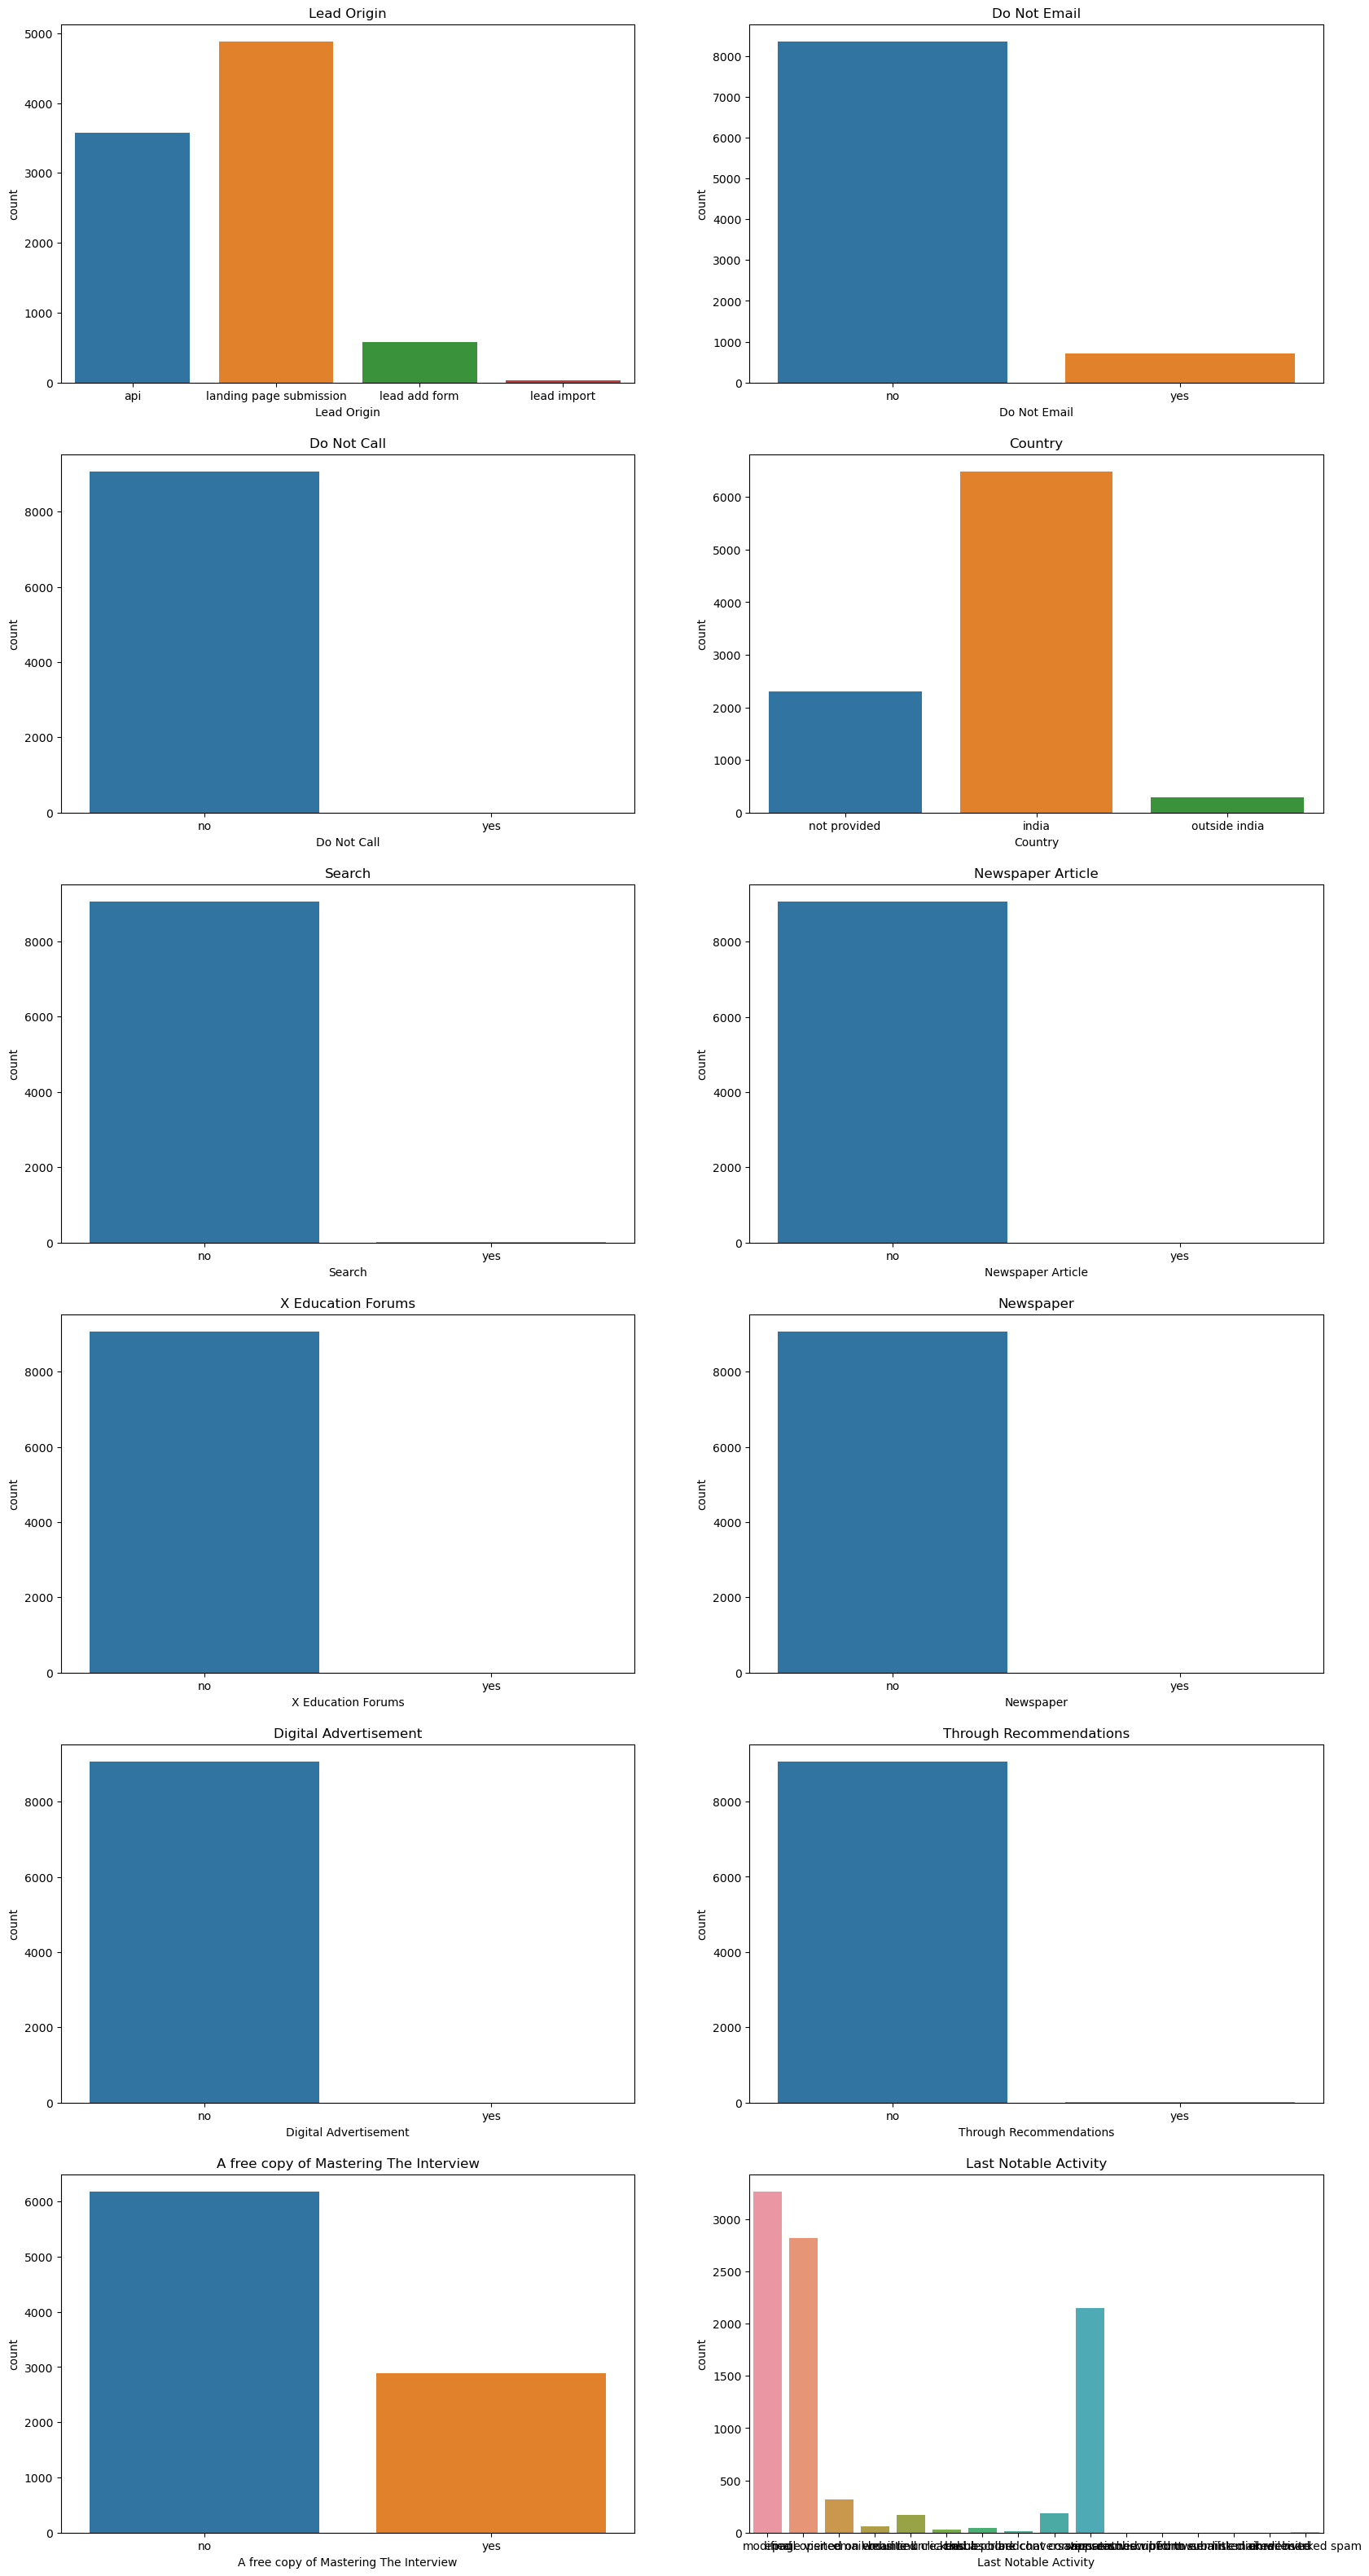

In [27]:
plt.figure(figsize=(20, 40))

plt.subplot(6, 2, 1)
sns.countplot(x='Lead Origin', data=df_final)  # Corrected the call
plt.title('Lead Origin')

# Add other subplots as needed

plt.subplot(6, 2, 2)
sns.countplot(x='Do Not Email', data=df_final)  # Correct syntax
plt.title('Do Not Email')


plt.subplot(6, 2, 3)
sns.countplot(x='Do Not Call', data=df_final)  # Correct syntax
plt.title('Do Not Call')

plt.subplot(6, 2, 4)
sns.countplot(x='Country', data=df_final)  # Correct syntax
plt.title('Country')

plt.subplot(6, 2, 5)
sns.countplot(x='Search', data=df_final)  # Correct syntax
plt.title('Search')

plt.subplot(6, 2, 6)
sns.countplot(x='Newspaper Article', data=df_final)  # Correct syntax
plt.title('Newspaper Article')

plt.subplot(6, 2, 7)
sns.countplot(x='X Education Forums', data=df_final)  # Correct syntax
plt.title('X Education Forums')

plt.subplot(6, 2, 8)
sns.countplot(x='Newspaper', data=df_final)  # Correct syntax
plt.title('Newspaper')

plt.subplot(6, 2, 9)
sns.countplot(x='Digital Advertisement', data=df_final)  # Correct syntax
plt.title('Digital Advertisement')

plt.subplot(6, 2, 10)
sns.countplot(x='Through Recommendations', data=df_final)  # Correct syntax
plt.title('Through Recommendations')

plt.subplot(6, 2, 11)
sns.countplot(x='A free copy of Mastering The Interview', data=df_final)  # Correct syntax
plt.title('A free copy of Mastering The Interview')

plt.subplot(6, 2, 12)
sns.countplot(x='Last Notable Activity', data=df_final)  # Correct syntax
plt.title('Last Notable Activity')

plt.show()

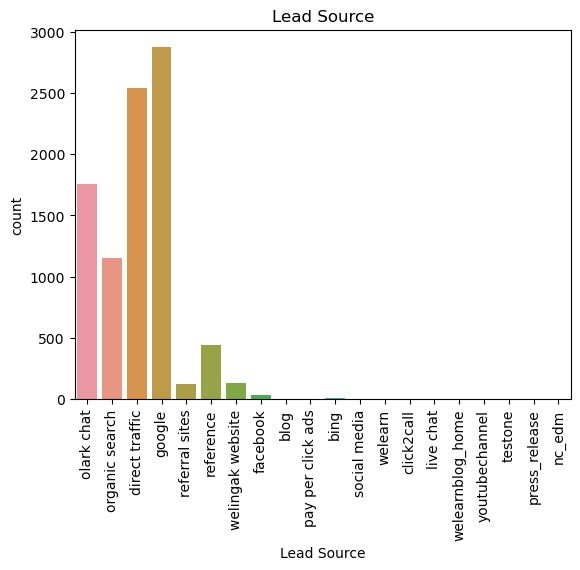

In [28]:
sns.countplot(x='Lead Source', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Lead Source')
plt.show()


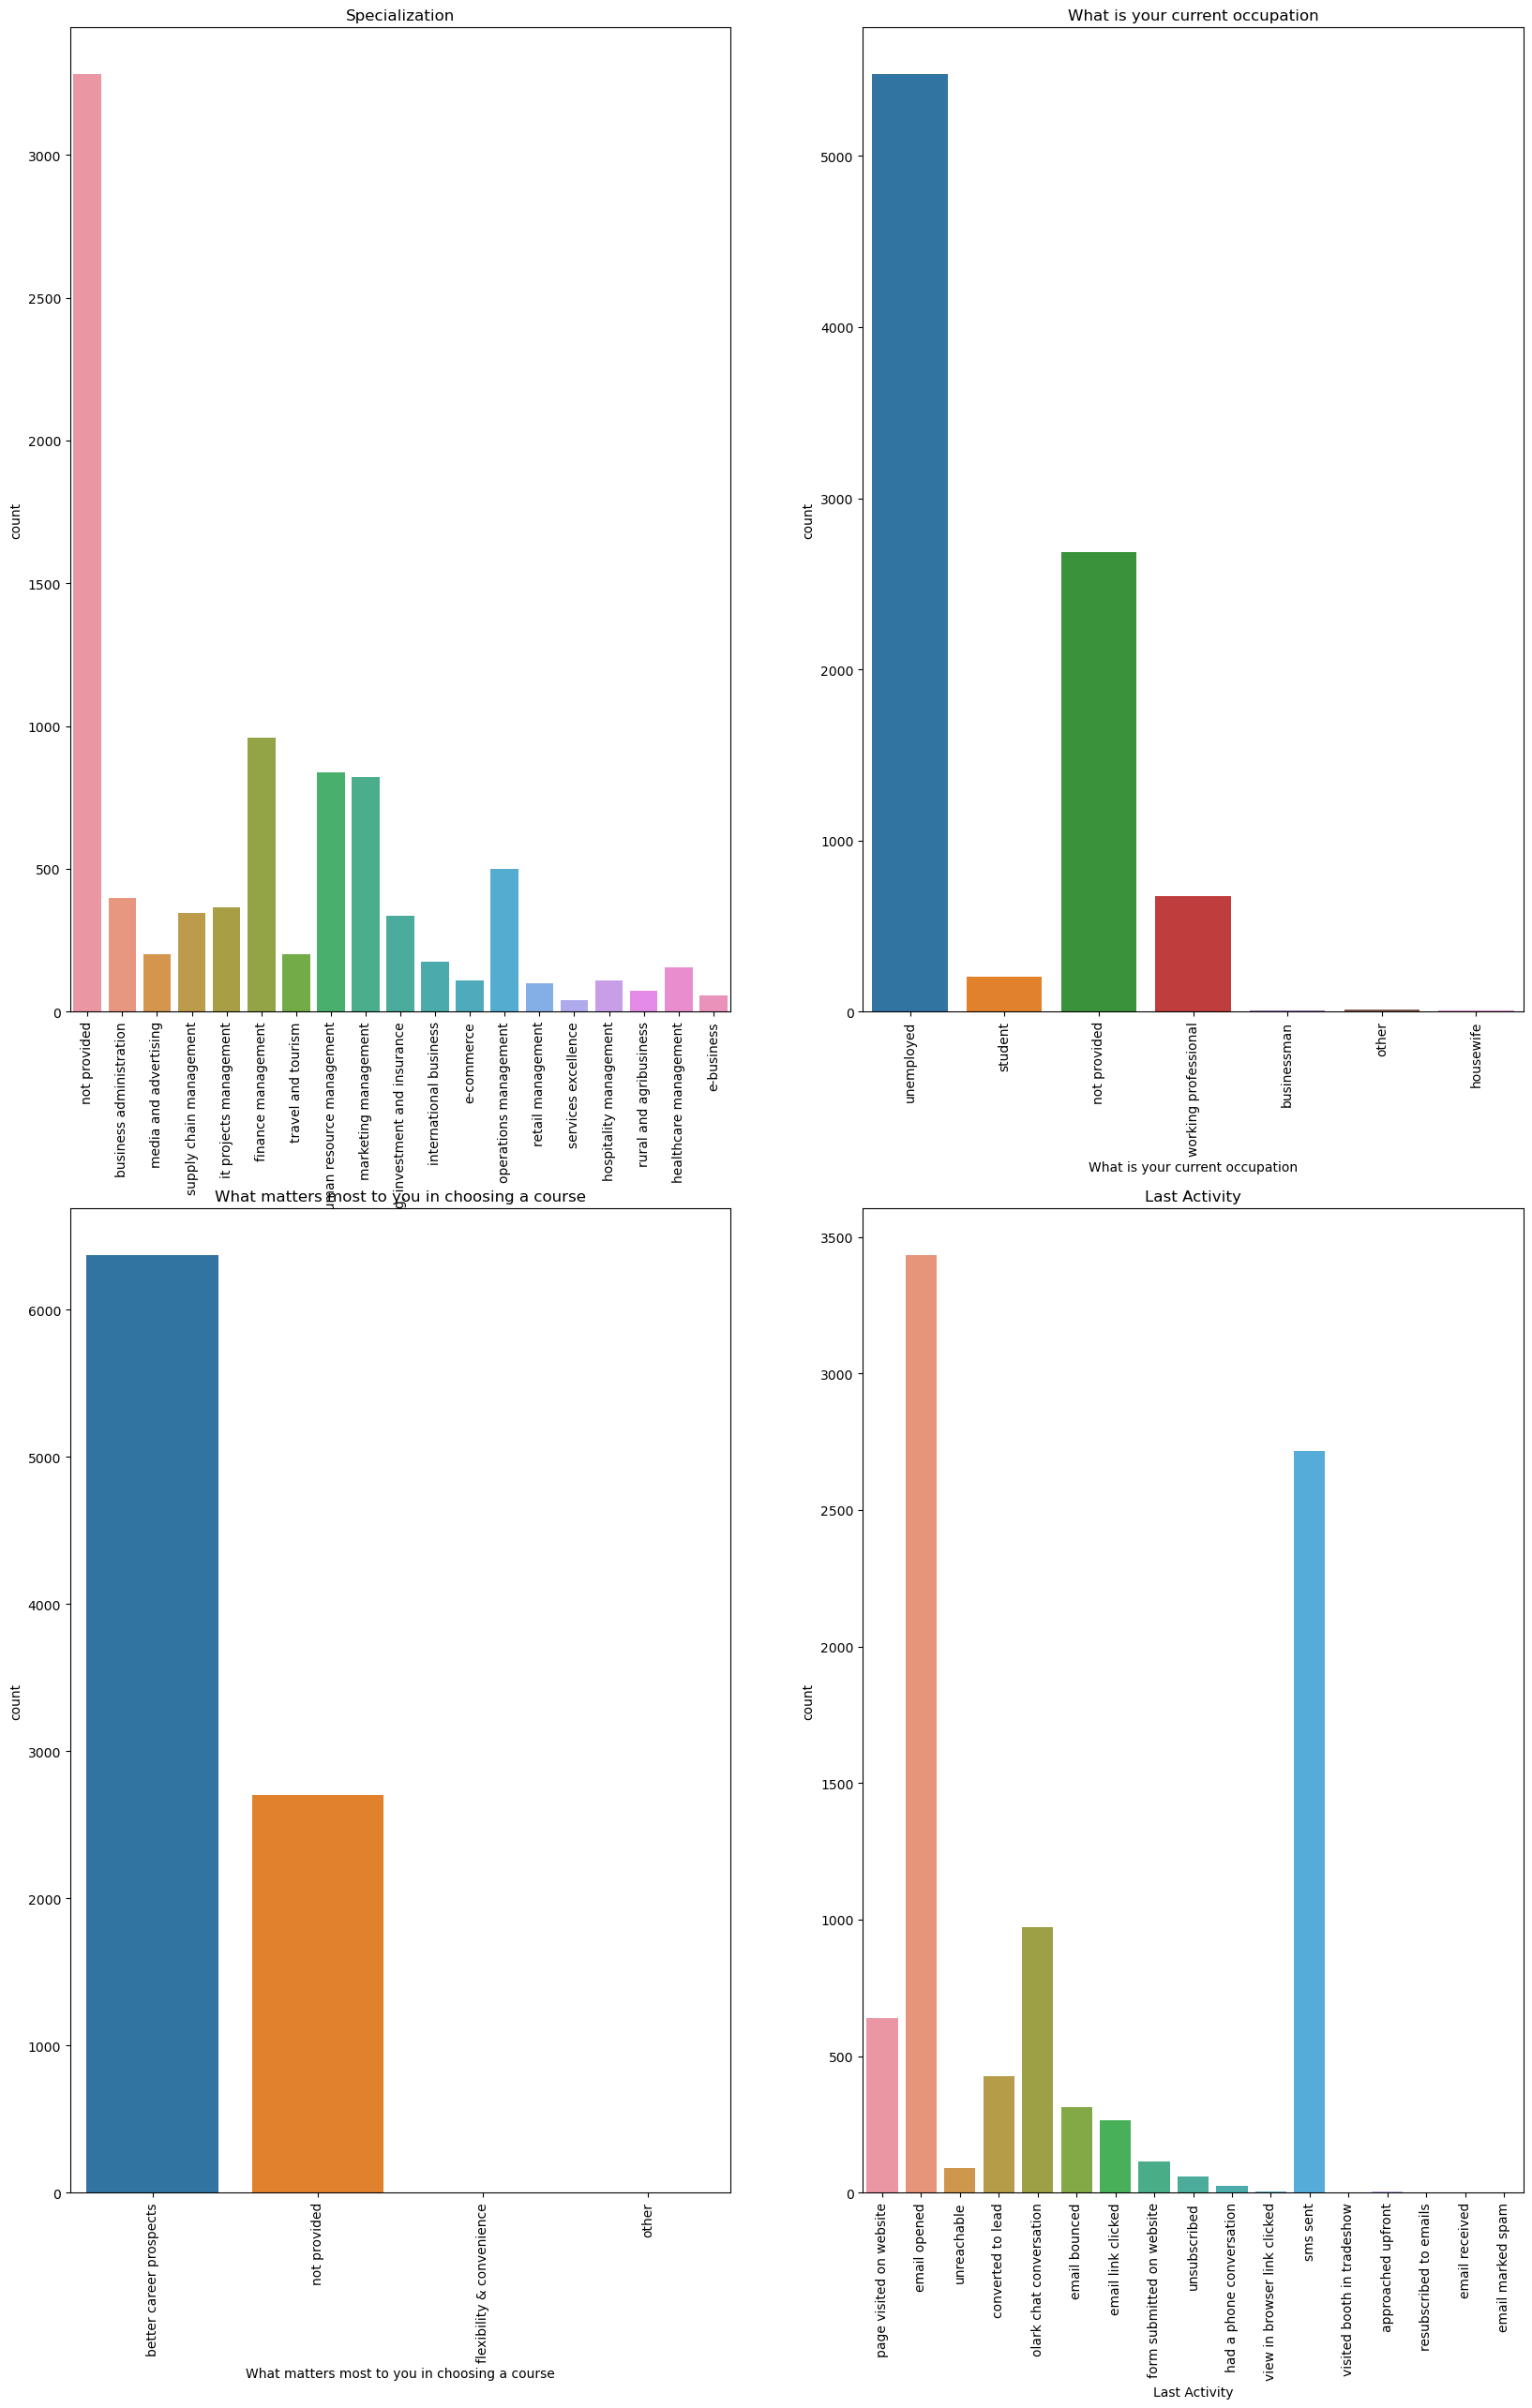

In [29]:
plt.figure(figsize = (20,30))

# Subplot 1
plt.subplot(2, 2, 1)
sns.countplot(x='Specialization', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Specialization')

plt.subplot(2, 2, 2)
sns.countplot(x='What is your current occupation', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('What is your current occupation')

plt.subplot(2, 2, 3)
sns.countplot(x='What matters most to you in choosing a course', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('What matters most to you in choosing a course')

plt.subplot(2, 2, 4)
sns.countplot(x='Last Activity', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels
plt.title('Last Activity')

plt.show()

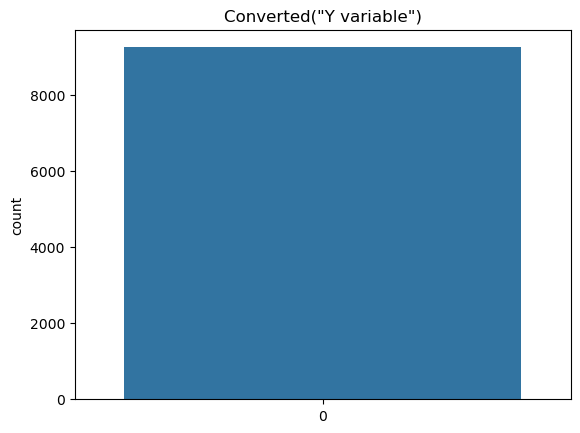

In [30]:
sns.countplot(df['Converted'])
plt.title('Converted("Y variable")')
plt.show()

#### 2.1.1. Numerical Variables

In [31]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 non-n

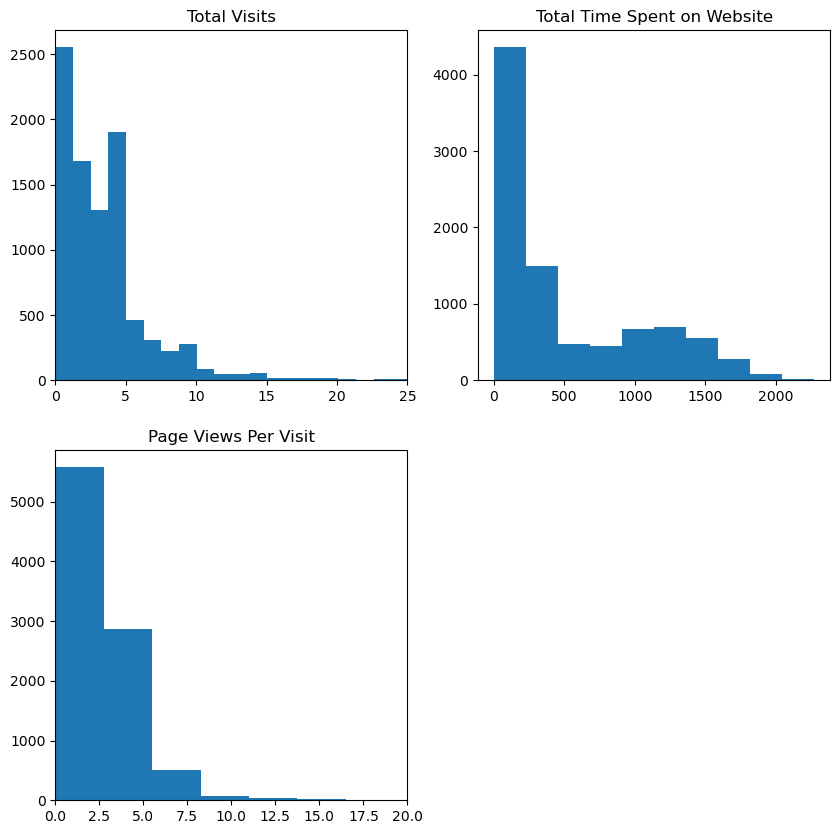

In [32]:
plt.figure(figsize = (10,10))
plt.subplot(221)
plt.hist(df_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(df_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(df_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

### 2.1. Relating all the categorical variables to Converted

In [33]:
print(df_final.dtypes)

Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Newspaper Article                                 object
X Education Forums                                object
Newspaper                                         object
Digital Advertisement          

In [34]:
print(df_final['Converted'].unique())

[0 1]


In [35]:
print(df_final['Lead Origin'].unique())

['api' 'landing page submission' 'lead add form' 'lead import']


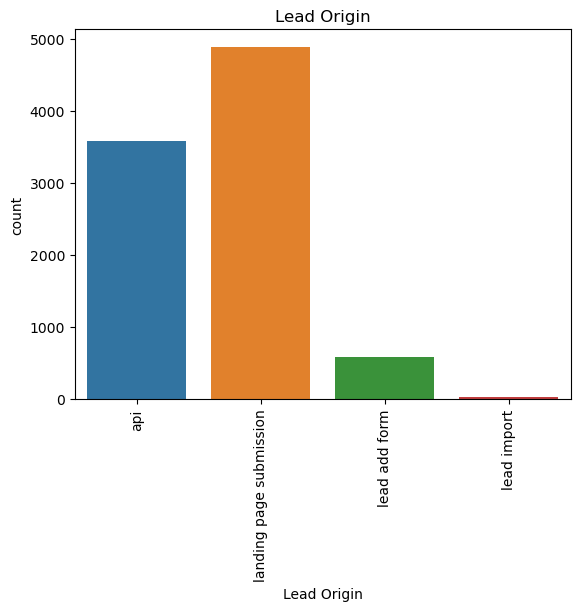

In [36]:
sns.countplot(x='Lead Origin', data=df_final)
plt.xticks(rotation=90)
plt.title('Lead Origin')
plt.show()


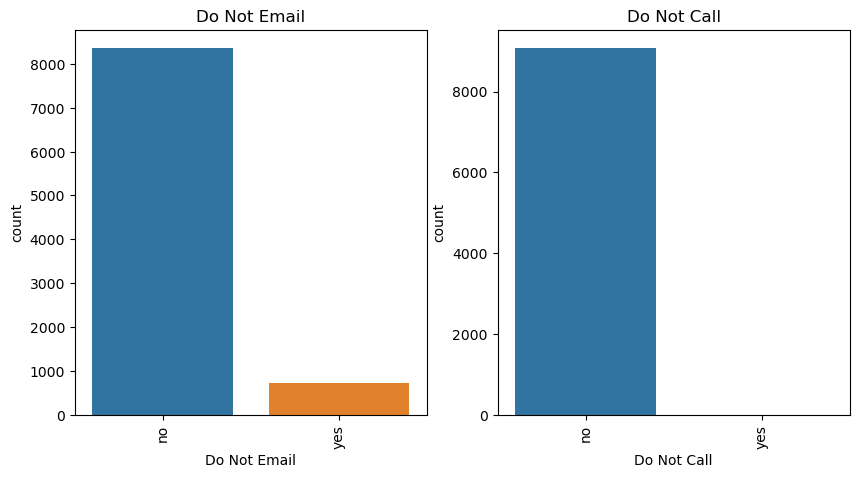

In [37]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

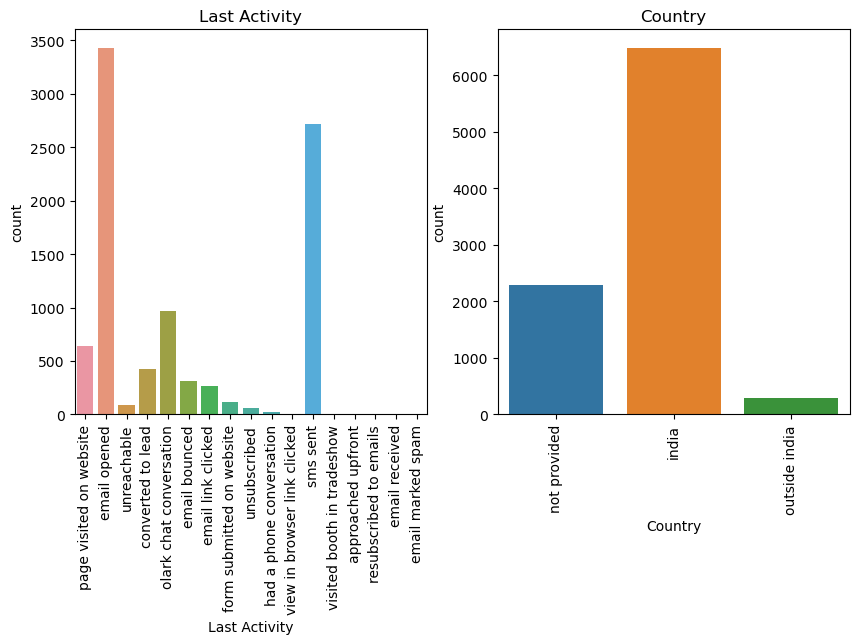

In [38]:


df_final['Converted'] = df_final['Converted'].astype('category')

# Plot
plt.figure(figsize=(10, 5))

# Subplot 1
plt.subplot(1, 2, 1)
sns.countplot(x='Last Activity', data=df_final)
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

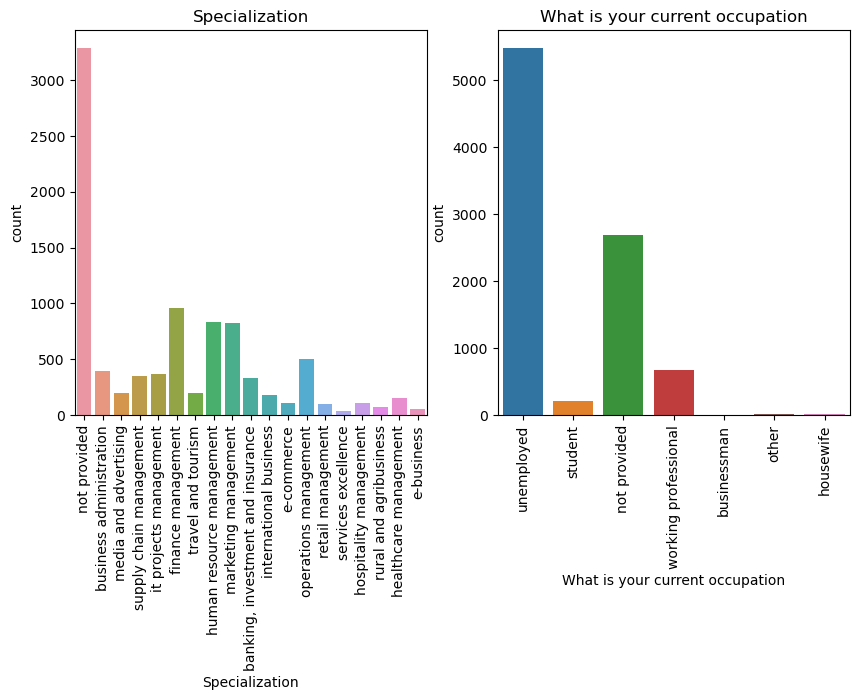

In [39]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

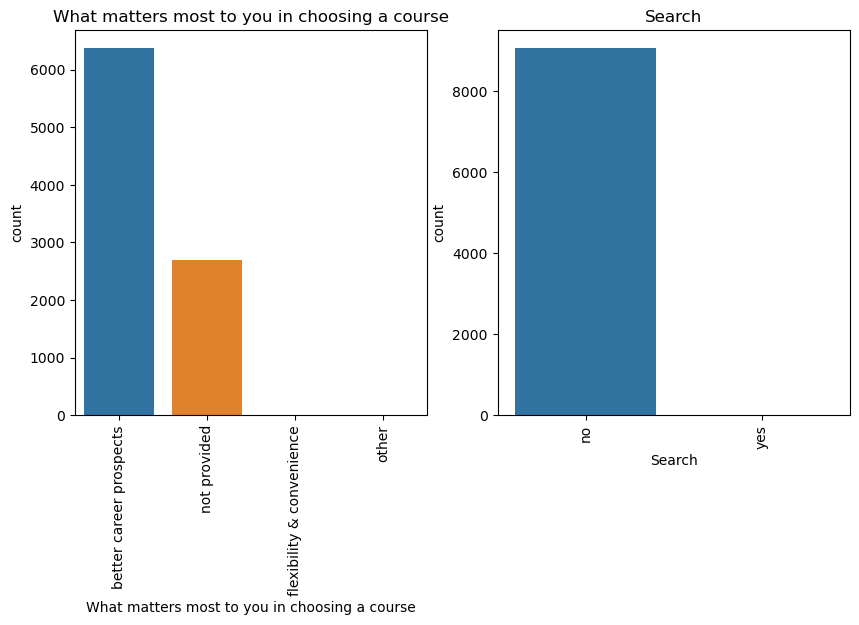

In [40]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

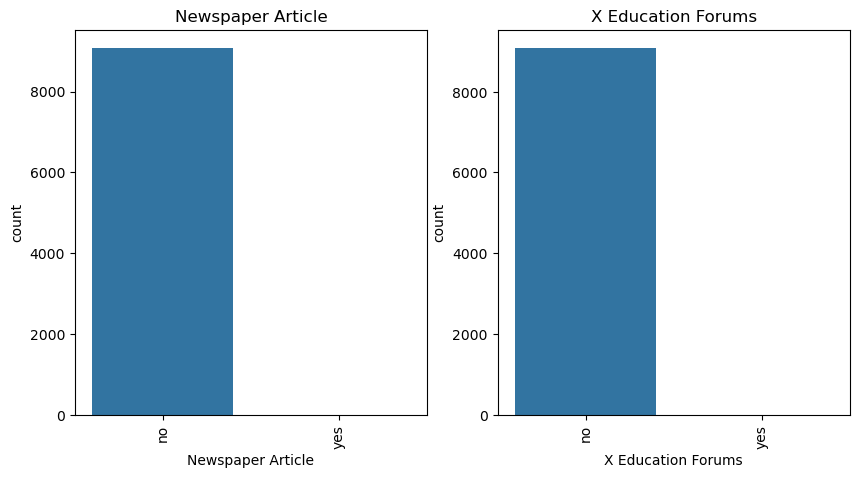

In [41]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

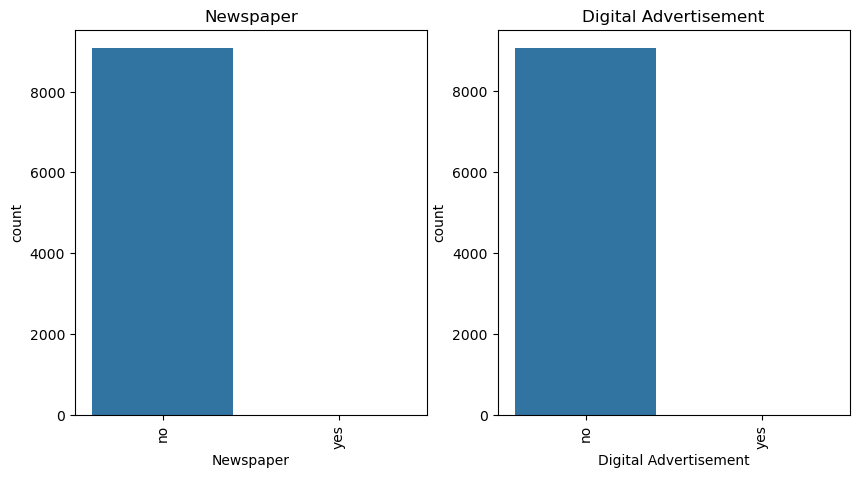

In [42]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

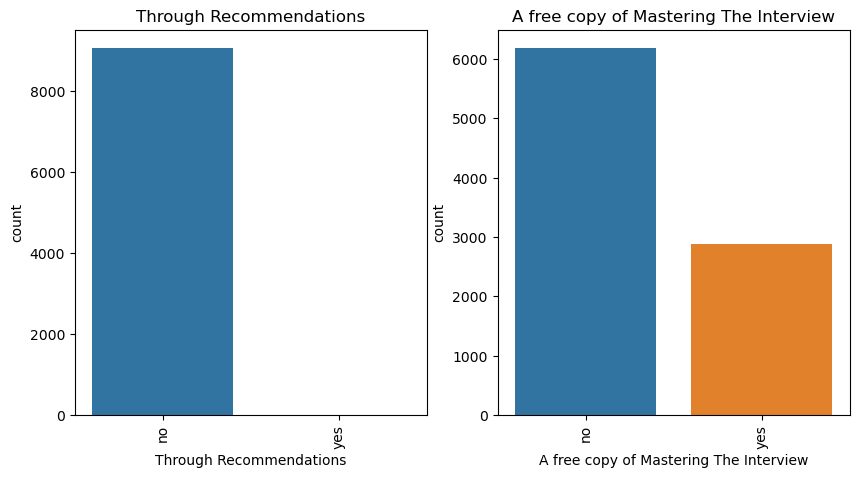

In [43]:
plt.figure(figsize = (10,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

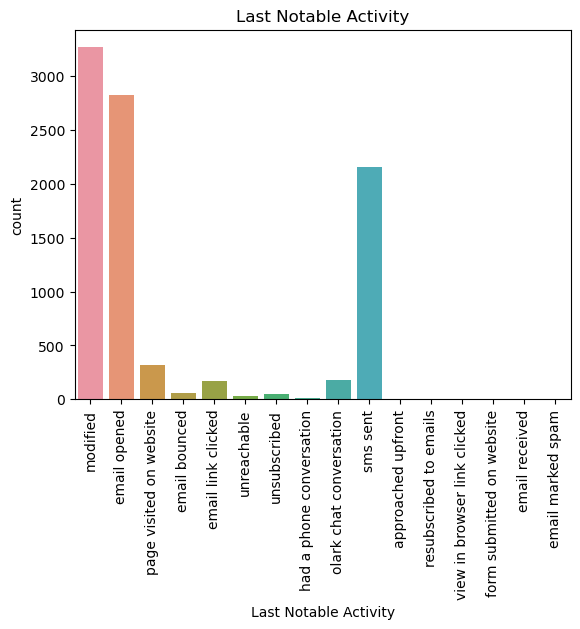

In [44]:
sns.countplot(x='Last Notable Activity', data= df_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

Also notice that when you got the value counts of all the columns, there were a few columns in which only one value was majorly present for all the data points. Since practically all of the values for these variables are `No` or same response, it's best that we drop these columns as they won't help with our analysis.

In [45]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Converted', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [46]:
df_final = df_final.drop(['Do Not Call', 'Search', 'Newspaper Article', 'X Education Forums', 'Newspaper', 'Digital Advertisement', 
                          'Through Recommendations'], axis =1)

In [47]:
df_final.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [48]:
df_final = df_final.drop(['What matters most to you in choosing a course'], axis =1)

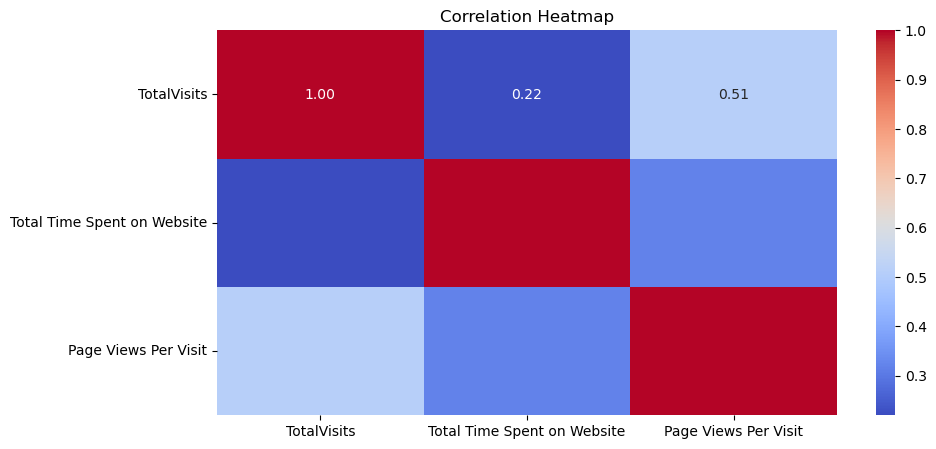

In [49]:
# To check the correlation among varibles
# Select only numeric columns for correlation
numeric_df = df_final.select_dtypes(include='number')

# To check the correlation among numeric variables
plt.figure(figsize=(10, 5))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


<font color= green>___It is understandable from the above EDA that there are many elements that have very little data and so will be of less relevance to our analysis.___</font>

In [50]:
numeric = df_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe(percentiles=[0.25,0.5,0.75,0.9,0.99])

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
90%,7.000000,1373.000000,5.000000
99%,17.000000,1839.000000,9.000000
max,251.000000,2272.000000,55.000000


<font color= green>___There aren't any major outliers, so moving on to analysis___</font>

In [51]:
df_final.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


### Dummy creation

The next step is to deal with the categorical variables present in the dataset.

In [52]:
# Check the columns which are of type 'object'

df_obj = df_final.select_dtypes(include=['object'])
df_obj.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [53]:
# Create dummy variables using the 'get_dummies' command
dummy = pd.get_dummies(df_final[['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)

# Add the results to the master dataframe
df_final2 = pd.concat([df_final, dummy], axis=1)

In [54]:
df_final2.head()

,Lead Origin,Lead Source,Do Not Email,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,api,olark chat,no,0,0.0,0,0.0,page visited on website,not provided,not provided,...,False,False,True,False,False,False,False,False,False,False
1,api,organic search,no,0,5.0,674,2.5,email opened,india,not provided,...,False,False,False,False,False,False,False,False,False,False
2,landing page submission,direct traffic,no,1,2.0,1532,2.0,email opened,india,business administration,...,False,False,False,False,False,False,False,False,False,False
3,landing page submission,direct traffic,no,0,1.0,305,1.0,unreachable,india,media and advertising,...,False,False,True,False,False,False,False,False,False,False
4,landing page submission,google,no,1,2.0,1428,1.0,converted to lead,india,not provided,...,False,False,True,False,False,False,False,False,False,False


In [55]:
df_final2.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Converted',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity',
       'Lead Origin_landing page submission', 'Lead Origin_lead add form',
       'Lead Origin_lead import', 'Lead Source_blog', 'Lead Source_click2call',
       'Lead Source_direct traffic', 'Lead Source_facebook',
       'Lead Source_google', 'Lead Source_live chat', 'Lead Source_nc_edm',
       'Lead Source_olark chat', 'Lead Source_organic search',
       'Lead Source_pay per click ads', 'Lead Source_press_release',
       'Lead Source_reference', 'Lead Source_referral sites',
       'Lead Source_social media', 'Lead Source_testone',
       'Lead Source_welearn', 'Lead Source_welearnblog_home',
       'Lead Source_welingak website', 'Lead Source_youtubechannel',
       'Do No

In [56]:
df_final2 = df_final2.drop(['Lead Origin', 'Lead Source', 'Do Not Email', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],axis=1)

In [57]:
# Removing dummy variables with not provided or select data

df_final2 = df_final2.drop(['Country_not provided','What is your current occupation_not provided','Specialization_not provided'],
              axis=1)

### Test-Train Split

Split the dataset into training an testing sets.

In [58]:
# Import the required library

from sklearn.model_selection import train_test_split

In [59]:
df_final2.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 9074 entries, 0 to 9239
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype   
---  ------                                                --------------  -----   
 0   Converted                                             9074 non-null   category
 1   TotalVisits                                           9074 non-null   float64 
 2   Total Time Spent on Website                           9074 non-null   int64   
 3   Page Views Per Visit                                  9074 non-null   float64 
 4   Lead Origin_landing page submission                   9074 non-null   bool    
 5   Lead Origin_lead add form                             9074 non-null   bool    
 6   Lead Origin_lead import                               9074 non-null   bool    
 7   Lead Source_blog                                      9074 non-null   bool    
 8   Lead Source_click2call                               

In [60]:
# Put all the feature variables in X

X = df_final2.drop(['Converted'], axis=1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
0,0.0,0,0.0,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
1,5.0,674,2.5,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,1532,2.0,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,1.0,305,1.0,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False
4,2.0,1428,1.0,True,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False


In [61]:
# Put the target variable in y

y = df_final2['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: category
Categories (2, int64): [0, 1]

In [62]:
# Split the dataset into 70% train and 30% test

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### Rescaling the Features 

Rescaling doesn't impact your model. Here we can see that except for `cnt`, all the columns have small integer values. So it is extremely important to rescale the variables so that they have a comparable scale. If we don't have comparable scales, then some of the coefficients as obtained by fitting the regression model might be very large or very small as compared to the other coefficients. This might become very annoying at the time of model evaluation. So it is advised to use standardization or normalization so that the units of the coefficients obtained are all on the same scale.

I will be using Min-Max scaling. 

In [63]:
# Import MinMax scaler

from sklearn.preprocessing import MinMaxScaler

In [64]:
# Scale the three numeric features present in the dataset - 'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit'


scaler = MinMaxScaler()
X_train[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits',
                                                                                                                'Total Time Spent on Website', 
                                                                                                                'Page Views Per Visit']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Origin_lead import,Lead Source_blog,Lead Source_click2call,Lead Source_direct traffic,Lead Source_facebook,...,Last Notable Activity_form submitted on website,Last Notable Activity_had a phone conversation,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website,Last Notable Activity_resubscribed to emails,Last Notable Activity_sms sent,Last Notable Activity_unreachable,Last Notable Activity_unsubscribed,Last Notable Activity_view in browser link clicked
3009,0.007968,0.178347,0.083333,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
1012,0.007968,0.085355,0.083333,True,False,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
9226,0.000000,0.000000,0.000000,False,False,False,False,False,False,False,...,False,False,True,False,False,False,False,False,False,False
4750,0.007968,0.619946,0.083333,True,False,False,False,False,True,False,...,False,False,False,False,False,False,True,False,False,False
7987,0.019920,0.711590,0.104167,True,False,False,False,False,True,False,...,False,False,True,False,False,False,False,False,False,False


In [65]:
X_train.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 3009 to 5754
Data columns (total 81 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   TotalVisits                                           6351 non-null   float64
 1   Total Time Spent on Website                           6351 non-null   float64
 2   Page Views Per Visit                                  6351 non-null   float64
 3   Lead Origin_landing page submission                   6351 non-null   bool   
 4   Lead Origin_lead add form                             6351 non-null   bool   
 5   Lead Origin_lead import                               6351 non-null   bool   
 6   Lead Source_blog                                      6351 non-null   bool   
 7   Lead Source_click2call                                6351 non-null   bool   
 8   Lead Source_direct traffic                            6351 n

## Model Building

Let's now move to model building. As you can see that there are a lot of variables present in the dataset which we cannot deal with. So the best way to approach this is to select a small set of features from this pool of variables using RFE.

In [66]:
# Import 'LogisticRegression' and create a LogisticRegression object

from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [67]:
# Import RFE and select 20 variables

from sklearn.feature_selection import RFE
rfe = RFE(estimator=logreg, n_features_to_select=20)             # running RFE with 20 variables as output
rfe = rfe.fit(X_train, y_train)

In [68]:
# Let's take a look at which features have been selected by RFE

list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 5),
 ('Lead Origin_landing page submission', False, 24),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 40),
 ('Lead Source_blog', False, 42),
 ('Lead Source_click2call', False, 34),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_facebook', False, 43),
 ('Lead Source_google', True, 1),
 ('Lead Source_live chat', False, 45),
 ('Lead Source_nc_edm', False, 14),
 ('Lead Source_olark chat', False, 15),
 ('Lead Source_organic search', True, 1),
 ('Lead Source_pay per click ads', False, 41),
 ('Lead Source_press_release', False, 56),
 ('Lead Source_reference', False, 6),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_social media', False, 20),
 ('Lead Source_testone', False, 39),
 ('Lead Source_welearn', False, 62),
 ('Lead Source_welearnblog_home', False, 47),
 ('Lead Source_welingak website', True, 1),
 ('Lead Source_youtubechannel', False

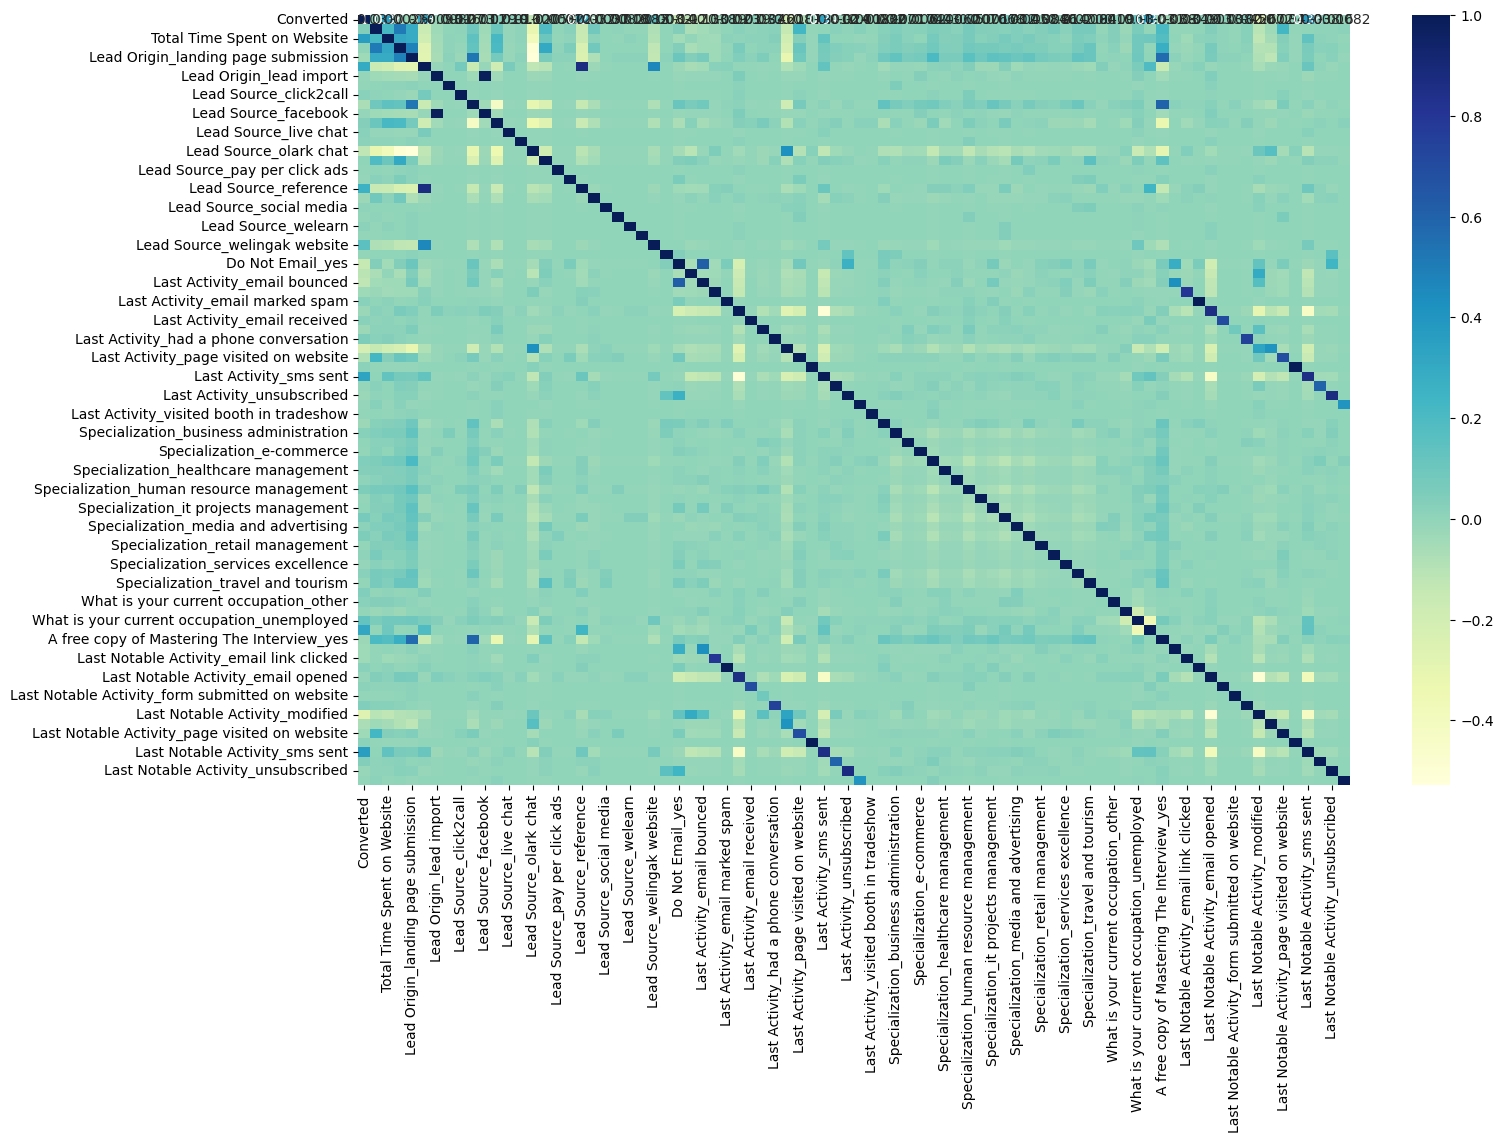

In [69]:
# Plotting a correlation matrix

plt.figure(figsize = (16, 10))
sns.heatmap(df_final2.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [70]:
# Put all the columns selected by RFE.

col = X_train.columns[rfe.support_]

In [71]:
# Import statsmodels

import statsmodels.api as sm

In [72]:
# Fit a logistic Regression model on X_train after adding a constant and output the summary

X_train_sm = sm.add_constant(X_train)

In [73]:
X_train_sm.info(all)

<class 'pandas.core.frame.DataFrame'>
Index: 6351 entries, 3009 to 5754
Data columns (total 82 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   const                                                 6351 non-null   float64
 1   TotalVisits                                           6351 non-null   float64
 2   Total Time Spent on Website                           6351 non-null   float64
 3   Page Views Per Visit                                  6351 non-null   float64
 4   Lead Origin_landing page submission                   6351 non-null   bool   
 5   Lead Origin_lead add form                             6351 non-null   bool   
 6   Lead Origin_lead import                               6351 non-null   bool   
 7   Lead Source_blog                                      6351 non-null   bool   
 8   Lead Source_click2call                                6351 n

In [74]:
print(X_train_sm.applymap(type).nunique())

const                                                 1
TotalVisits                                           1
Total Time Spent on Website                           1
Page Views Per Visit                                  1
Lead Origin_landing page submission                   1
                                                     ..
Last Notable Activity_resubscribed to emails          1
Last Notable Activity_sms sent                        1
Last Notable Activity_unreachable                     1
Last Notable Activity_unsubscribed                    1
Last Notable Activity_view in browser link clicked    1
Length: 82, dtype: int64


In [75]:
print(X_train_sm.isnull().sum())
print(y_train.isnull().sum())

const                                                 0
TotalVisits                                           0
Total Time Spent on Website                           0
Page Views Per Visit                                  0
Lead Origin_landing page submission                   0
                                                     ..
Last Notable Activity_resubscribed to emails          0
Last Notable Activity_sms sent                        0
Last Notable Activity_unreachable                     0
Last Notable Activity_unsubscribed                    0
Last Notable Activity_view in browser link clicked    0
Length: 82, dtype: int64
0


In [76]:
#Converetd all the data types to float as boolean dtype was throwing error.

X_train_sm = X_train_sm.astype(float)  # For all columns
y_train = y_train.astype(float)

In [77]:
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6272
Model Family:                Binomial   Df Model:                           78
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2467.9
Date:                Mon, 18 Nov 2024   Deviance:                       4935.9
Time:                        01:09:19   Pearson chi2:                 6.15e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4264
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   20.2947   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
TotalVisits                                              9.7356      2.460      3.958      0.000       4.915      14.556
Total Time Spent on Website                              4.6205      0.173     26.703      0.000       4.281       4.960
Page Views Per Visit                                    -1.3903      0.609     -2.284      0.022      -2.584      -0.197
Lead Origin_landing page submission                     -0.5617      0.131     -4.301      0.000      -0.818      -0.306
Lead Origin_lead add form                               -0.9673      1.568     -0.617      0.537      -4.041       2.106
Lead Origin_lead import                                 24.3764   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_blog                                       -22.5005   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_click2call                                   2.0055      2.489      0.806      0.420      -2.873       6.884
Lead Source_direct traffic                              -0.9004      1.435     -0.627      0.530      -3.713       1.913
Lead Source_facebook                                   -24.2081   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_google                                      -0.6158      1.434     -0.429      0.668      -3.427       2.196
Lead Source_live chat                                   24.3270   5.62e+04      0.000      1.000    -1.1e+05     1.1e+05
Lead Source_nc_edm                                      23.8264   7.95e+04      0.000      1.000   -1.56e+05    1.56e+05
Lead Source_olark chat                                   0.4926      1.438      0.343      0.732      -2.326       3.311
Lead Source_organic search                              -0.7995      1.437     -0.557      0.578      -3.615       2.016
Lead Source_pay per click ads                          -22.5668   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_press_release                              -20.9949   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_reference                                    3.5084      2.139      1.640      0.101      -0.685       7.701
Lead Source_referral sites                              -0.9674      1.477     -0.655      0.513      -3.863       1.928
Lead Source_social media                                 1.0872      2.095      0.519      0.604      -3.019       5.193
Lead Source_testone                                    -22.5827   7.95e+04     -0.000      1.000   -1.56e+05    1.56e+05
Lead Source_welearn                                  -3.09

There are quite a many variable which have a p-value greater than `0.05`. We will need to take care of them. But first, let's also look at the VIFs.

In [78]:
# Import 'variance_inflation_factor'

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [79]:
# Make a VIF dataframe for all the variables present

vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [80]:
pd.set_option('display.max_columns', None)

print(vif)

                                        Features      VIF
77  Last Notable Activity_resubscribed to emails      inf
69       Last Notable Activity_email marked spam      inf
37          Last Activity_resubscribed to emails      inf
30               Last Activity_email marked spam      inf
0                                          const  8554.77
..                                           ...      ...
43                         Country_outside india     1.05
58            Specialization_services excellence     1.04
62         What is your current occupation_other     1.02
61     What is your current occupation_housewife     1.02
22                           Lead Source_welearn      NaN

[82 rows x 2 columns]


In [81]:
#VIFs seem to be very high certain variables. Dropping those variables with high VIF and p values

In [82]:
X_train2_sm = X_train_sm.drop(['Last Notable Activity_unsubscribed','Last Notable Activity_unreachable','Last Notable Activity_sms sent',
                         'Last Notable Activity_view in browser link clicked','Last Notable Activity_resubscribed to emails',
                        'Last Activity_resubscribed to emails','Last Activity_email marked spam','Last Notable Activity_email received',
                         'Last Notable Activity_form submitted on website','Last Notable Activity_had a phone conversation','Last Activity_page visited on website',
                         'Last Activity_resubscribed to emails','Last Activity_sms sent','Last Activity_unreachable','Last Activity_unsubscribed',
                         'Last Activity_view in browser link clicked','Last Activity_visited booth in tradeshow','Country_outside india'], axis = 1)

In [83]:
# Refit the model with the new set of features

In [84]:
X_train2_sm = X_train2_sm.astype(float)  # For all columns
y_train = y_train.astype(float)
logm2 = sm.GLM(y_train, X_train2_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6287
Model Family:                Binomial   Df Model:                           63
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 18 Nov 2024   Deviance:                   1.2544e+05
Time:                        01:09:24   Pearson chi2:                 6.13e+18
No. Iterations:                   100   Pseudo R-squ. (CS):                nan
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                 -1.37e+15   3.89e+07  -3.52e+07      0.000   -1.37e+15   -1.37e+15
TotalVisits                                           3.857e+15   4.84e+07   7.96e+07      0.000    3.86e+15    3.86e+15
Total Time Spent on Website                           4.572e+14      4e+06   1.14e+08      0.000    4.57e+14    4.57e+14
Page Views Per Visit                                 -4.111e+14   1.43e+07  -2.88e+07      0.000   -4.11e+14   -4.11e+14
Lead Origin_landing page submission                  -2.014e+14   3.13e+06  -6.43e+07      0.000   -2.01e+14   -2.01e+14
Lead Origin_lead add form                             -7.63e+14   4.76e+07   -1.6e+07      0.000   -7.63e+14   -7.63e+14
Lead Origin_lead import                              -1.289e+15   6.89e+07  -1.87e+07      0.000   -1.29e+15   -1.29e+15
Lead Source_blog                                     -2.325e+15   7.77e+07  -2.99e+07      0.000   -2.33e+15   -2.33e+15
Lead Source_click2call                                3.723e+15   7.27e+07   5.12e+07      0.000    3.72e+15    3.72e+15
Lead Source_direct traffic                            1.214e+15   3.89e+07   3.12e+07      0.000    1.21e+15    1.21e+15
Lead Source_facebook                                  1.008e+15   7.78e+07    1.3e+07      0.000    1.01e+15    1.01e+15
Lead Source_google                                    1.362e+15   3.88e+07   3.51e+07      0.000    1.36e+15    1.36e+15
Lead Source_live chat                                 6.009e+15   7.77e+07   7.74e+07      0.000    6.01e+15    6.01e+15
Lead Source_nc_edm                                    6.532e+15   7.76e+07   8.41e+07      0.000    6.53e+15    6.53e+15
Lead Source_olark chat                                2.117e+15   3.89e+07   5.44e+07      0.000    2.12e+15    2.12e+15
Lead Source_organic search                              1.2e+15   3.89e+07   3.09e+07      0.000     1.2e+15     1.2e+15
Lead Source_pay per click ads                        -3.123e+15   7.76e+07  -4.03e+07      0.000   -3.12e+15   -3.12e+15
Lead Source_press_release                             -1.34e+15    7.8e+07  -1.72e+07      0.000   -1.34e+15   -1.34e+15
Lead Source_reference                                 3.063e+15   6.16e+07   4.97e+07      0.000    3.06e+15    3.06e+15
Lead Source_referral sites                            1.392e+15   3.95e+07   3.52e+07      0.000    1.39e+15    1.39e+15
Lead Source_social media                              1.991e+15   6.15e+07   3.24e+07      0.000    1.99e+15    1.99e+15
Lead Source_testone                                  -2.777e+15   7.77e+07  -3.57e+07      0.000   -2.78e+15   -2.78e+15
Lead Source_welearn                                     -5

In [85]:
vif = pd.DataFrame()
vif['Features'] = X_train2_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train2_sm.values, i) for i in range(X_train2_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [86]:
vif

,Features,VIF
0,const,2136.54
11,Lead Source_google,463.69
9,Lead Source_direct traffic,427.77
14,Lead Source_olark chat,324.07
18,Lead Source_reference,261.90
...,...,...
53,What is your current occupation_other,1.02
60,Last Notable Activity_email marked spam,1.01
31,Last Activity_email received,1.01
33,Last Activity_had a phone conversation,1.01


In [87]:
#Removing columns with high VIF

In [88]:
X_train3_sm = X_train2_sm.drop(['Lead Source_blog','Lead Source_click2call','Lead Source_facebook','Lead Source_live chat',
                               'Lead Source_nc_edm','Lead Source_olark chat','Lead Source_pay per click ads',
                               'Lead Source_press_release','Lead Source_reference','Lead Source_social media',
                               'Lead Source_testone','Lead Source_welearn','Lead Source_welearnblog_home','Lead Source_youtubechannel'], axis = 1)

In [89]:
X_train3_sm = X_train3_sm.astype(float)  # For all columns
y_train = y_train.astype(float)
logm2 = sm.GLM(y_train, X_train3_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6300
Model Family:                Binomial   Df Model:                           50
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2490.0
Date:                Mon, 18 Nov 2024   Deviance:                       4980.0
Time:                        01:09:26   Pearson chi2:                 6.16e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4224
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.4220      0.123     -3.422      0.001      -0.664      -0.180
TotalVisits                                              9.5314      2.428      3.926      0.000       4.774      14.289
Total Time Spent on Website                              4.6150      0.172     26.849      0.000       4.278       4.952
Page Views Per Visit                                    -1.5330      0.601     -2.552      0.011      -2.711      -0.355
Lead Origin_landing page submission                     -0.5819      0.129     -4.506      0.000      -0.835      -0.329
Lead Origin_lead add form                                2.0136      0.235      8.576      0.000       1.553       2.474
Lead Origin_lead import                                 -0.2717      0.469     -0.579      0.562      -1.191       0.648
Lead Source_direct traffic                              -1.3621      0.164     -8.314      0.000      -1.683      -1.041
Lead Source_google                                      -1.0845      0.141     -7.695      0.000      -1.361      -0.808
Lead Source_organic search                              -1.2638      0.172     -7.349      0.000      -1.601      -0.927
Lead Source_referral sites                              -1.4518      0.369     -3.933      0.000      -2.175      -0.728
Lead Source_welingak website                             2.3385      0.757      3.091      0.002       0.856       3.822
Do Not Email_yes                                        -1.6576      0.207     -8.006      0.000      -2.063      -1.252
Last Activity_converted to lead                         -1.2843      0.247     -5.196      0.000      -1.769      -0.800
Last Activity_email bounced                             -1.3523      0.637     -2.123      0.034      -2.601      -0.104
Last Activity_email link clicked                        -0.5643      0.390     -1.447      0.148      -1.329       0.200
Last Activity_email opened                              -0.2177      0.170     -1.284      0.199      -0.550       0.115
Last Activity_email received                            19.0609    3.4e+04      0.001      1.000   -6.66e+04    6.67e+04
Last Activity_form submitted on website                 -0.7215      0.359     -2.010      0.044      -1.425      -0.018
Last Activity_had a phone conversation                   1.6256      0.766      2.122      0.034       0.124       3.127
Last Activity_olark chat conversation                   -1.5169      0.214     -7.087      0.000      -1.936      -1.097
Specialization_business administration                   0.4842      0.202      2.400      0.016       0.089       0.880
Specialization_e-business                                0

In [90]:
vif = pd.DataFrame()
vif['Features'] = X_train3_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train3_sm.values, i) for i in range(X_train3_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)

In [91]:
vif

,Features,VIF
0,const,13.32
47,Last Notable Activity_email opened,6.68
16,Last Activity_email opened,5.71
7,Lead Source_direct traffic,4.29
8,Lead Source_google,3.52
4,Lead Origin_landing page submission,3.42
48,Last Notable Activity_modified,3.12
15,Last Activity_email link clicked,3.10
45,Last Notable Activity_email link clicked,3.10
9,Lead Source_organic search,2.70


In [92]:
rfe = RFE(estimator=logreg, n_features_to_select=15)             # running RFE with 15 variables as output
rfe = rfe.fit(X_train3_sm, y_train)

In [93]:
list(zip(X_train3_sm.columns, rfe.support_, rfe.ranking_))

[('const', False, 37),
 ('TotalVisits', False, 2),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 10),
 ('Lead Origin_landing page submission', False, 16),
 ('Lead Origin_lead add form', True, 1),
 ('Lead Origin_lead import', False, 30),
 ('Lead Source_direct traffic', True, 1),
 ('Lead Source_google', False, 4),
 ('Lead Source_organic search', False, 3),
 ('Lead Source_referral sites', True, 1),
 ('Lead Source_welingak website', True, 1),
 ('Do Not Email_yes', True, 1),
 ('Last Activity_converted to lead', False, 9),
 ('Last Activity_email bounced', False, 8),
 ('Last Activity_email link clicked', False, 11),
 ('Last Activity_email opened', False, 28),
 ('Last Activity_email received', False, 36),
 ('Last Activity_form submitted on website', False, 12),
 ('Last Activity_had a phone conversation', True, 1),
 ('Last Activity_olark chat conversation', True, 1),
 ('Specialization_business administration', False, 24),
 ('Specialization_e-business', False, 13),


In [94]:
# Removing varaibles with high p value and low ranks in RFE

x_train4_sm = X_train3_sm.drop([ 'Last Activity_email received', 'A free copy of Mastering The Interview_yes', 'Specialization_services excellence', 'Last Notable Activity_email bounced', 'Specialization_hospitality management', 'Specialization_media and advertising', 'Lead Origin_lead import', 'Specialization_retail management', 'Last Activity_email opened', 'Specialization_international business', 'Specialization_travel and tourism', 'Last Notable Activity_email marked spam', 'Specialization_business administration', 'Specialization_rural and agribusiness', 'Specialization_operations management', 'Specialization_supply chain management', 'Specialization_human resource management', 'Specialization_finance management', 'Specialization_it projects management', 'Specialization_healthcare management',
],axis = 1)

In [95]:
#vif.to_csv(r'C:\Users\Abhishek Goel\Downloads\IIITB\Lead+Scoring+Case+Study\Lead Scoring Assignment\vif.csv', index=False)

In [96]:
x_train4_sm = x_train4_sm.astype(float)  # For all columns
y_train = y_train.astype(float)
logm2 = sm.GLM(y_train, x_train4_sm, family = sm.families.Binomial())
res = logm2.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6320
Model Family:                Binomial   Df Model:                           30
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2503.9
Date:                Mon, 18 Nov 2024   Deviance:                       5007.8
Time:                        01:09:31   Pearson chi2:                 6.15e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4199
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -0.3954      0.121     -3.257      0.001      -0.633      -0.157
TotalVisits                                              9.7183      2.414      4.025      0.000       4.986      14.451
Total Time Spent on Website                              4.6489      0.171     27.221      0.000       4.314       4.984
Page Views Per Visit                                    -1.3782      0.595     -2.315      0.021      -2.545      -0.211
Lead Origin_landing page submission                     -0.2790      0.102     -2.732      0.006      -0.479      -0.079
Lead Origin_lead add form                                2.2127      0.229      9.642      0.000       1.763       2.662
Lead Source_direct traffic                              -1.3955      0.155     -9.004      0.000      -1.699      -1.092
Lead Source_google                                      -1.0457      0.137     -7.621      0.000      -1.315      -0.777
Lead Source_organic search                              -1.3071      0.167     -7.810      0.000      -1.635      -0.979
Lead Source_referral sites                              -1.4942      0.366     -4.081      0.000      -2.212      -0.777
Lead Source_welingak website                             2.1114      0.754      2.800      0.005       0.633       3.589
Do Not Email_yes                                        -1.6058      0.204     -7.857      0.000      -2.006      -1.205
Last Activity_converted to lead                         -1.1962      0.237     -5.050      0.000      -1.660      -0.732
Last Activity_email bounced                             -1.2955      0.428     -3.027      0.002      -2.134      -0.457
Last Activity_email link clicked                        -0.4926      0.382     -1.288      0.198      -1.242       0.257
Last Activity_form submitted on website                 -0.5233      0.348     -1.502      0.133      -1.206       0.160
Last Activity_had a phone conversation                   1.5936      0.766      2.081      0.037       0.093       3.094
Last Activity_olark chat conversation                   -1.4300      0.198     -7.207      0.000      -1.819      -1.041
Specialization_e-business                                0.4825      0.423      1.142      0.254      -0.346       1.311
Specialization_e-commerce                                0.3475      0.327      1.063      0.288      -0.293       0.988
Specialization_marketing management                      0.3483      0.122      2.844      0.004       0.108       0.588
What is your current occupation_housewife               23.9075   1.57e+04      0.002      0.999   -3.07e+04    3.07e+04
What is your current occupation_other                    1

## Model Evaluation

Now, both the p-values and VIFs seem decent enough for all the variables. 

In [97]:
# Use 'predict' to predict the probabilities on the train set

y_train_pred = res.predict(x_train4_sm)
y_train_pred[:10]

3009    0.066244
1012    0.280448
9226    0.310075
4750    0.754583
7987    0.707644
1281    0.824012
2880    0.041664
4971    0.941330
7536    0.854286
1248    0.649042
dtype: float64

In [98]:
# Create a new dataframe containing the actual conversion flag and the probabilities predicted by the model

y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred_final.head()

,Converted,Conversion_Prob
3009,0.0,0.066244
1012,0.0,0.280448
9226,0.0,0.310075
4750,1.0,0.754583
7987,1.0,0.707644


In [99]:
#### Creating new column 'Predicted' with 1 if Paid_Prob > 0.5 else 0

y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's take a look at the head
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted
3009,0.0,0.066244,0
1012,0.0,0.280448,0
9226,0.0,0.310075,0
4750,1.0,0.754583,1
7987,1.0,0.707644,1


In [100]:
# Import metrics from sklearn for evaluation

from sklearn import metrics

In [101]:
# Create confusion matrix 

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3466  439]
 [ 705 1741]]


In [102]:
# Let's check the overall accuracy

print(metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted))

0.819870886474571


In [103]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [104]:
# Calculate the sensitivity

TP/(TP+FN)

0.7117743254292723

In [105]:
# Calculate the specificity

TN/(TN+FP)

0.8875800256081946

### Finding the Optimal Cutoff

Now 0.5 was just arbitrary to loosely check the model performace. But in order to get good results, you need to optimise the threshold. So first let's plot an ROC curve to see what AUC we get.

In [106]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [107]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, 
                                         y_train_pred_final.Conversion_Prob, drop_intermediate = False )

In [108]:
# Import matplotlib to plot the ROC curve

import matplotlib.pyplot as plt

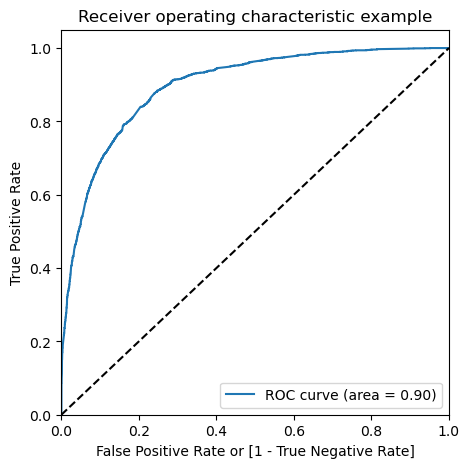

In [109]:
# Call the ROC function

draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Prob)

The area under the curve of the ROC is 0.9 which is quite good. So we seem to have a good model. Let's also check the sensitivity and specificity tradeoff to find the optimal cutoff point.

In [110]:
# Let's create columns with different probability cutoffs 

numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
3009,0.0,0.066244,0,1,0,0,0,0,0,0,0,0,0
1012,0.0,0.280448,0,1,1,1,0,0,0,0,0,0,0
9226,0.0,0.310075,0,1,1,1,1,0,0,0,0,0,0
4750,1.0,0.754583,1,1,1,1,1,1,1,1,1,0,0
7987,1.0,0.707644,1,1,1,1,1,1,1,1,1,0,0


In [111]:
# Let's create a dataframe to see the values of accuracy, sensitivity, and specificity at 
# different values of probabiity cutoffs

cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.385136  1.000000  0.000000
0.1   0.1  0.639269  0.973835  0.429706
0.2   0.2  0.772162  0.922322  0.678105
0.3   0.3  0.803496  0.880621  0.755186
0.4   0.4  0.820186  0.787817  0.840461
0.5   0.5  0.819871  0.711774  0.887580
0.6   0.6  0.812156  0.641047  0.919334
0.7   0.7  0.788852  0.533524  0.948784
0.8   0.8  0.767753  0.448896  0.967478
0.9   0.9  0.719414  0.293132  0.986428


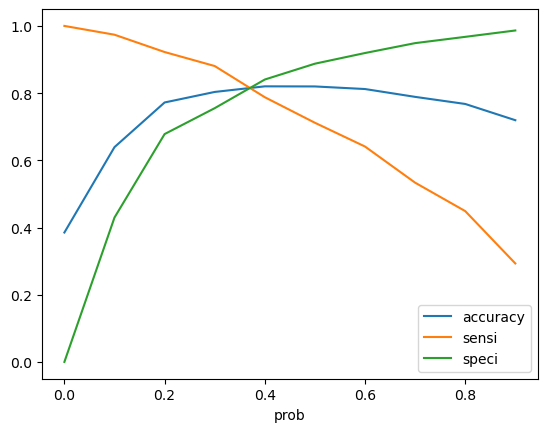

In [112]:
# Let's plot it as well

cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

As you can see that around 0.4, you get the optimal values of the three metrics. So let's choose 0.4 as our cutoff now.

In [113]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Prob.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,Converted,Conversion_Prob,Predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
3009,0.0,0.066244,0,1,0,0,0,0,0,0,0,0,0,0
1012,0.0,0.280448,0,1,1,1,0,0,0,0,0,0,0,0
9226,0.0,0.310075,0,1,1,1,1,0,0,0,0,0,0,0
4750,1.0,0.754583,1,1,1,1,1,1,1,1,1,0,0,1
7987,1.0,0.707644,1,1,1,1,1,1,1,1,1,0,0,1


In [114]:
# Let's check the accuracy now

metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8201857975122028

In [115]:
# Let's create the confusion matrix once again

confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
print(confusion)

[[3466  439]
 [ 705 1741]]


In [116]:
# Let's evaluate the other metrics as well

TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [117]:
# Calculate the sensitivity

TP/(TP+FN)

0.7117743254292723

In [118]:
# Calculate Specificity

TN/(TN+FP)

0.8875800256081946

## Making Predictions on the Test Set

In [119]:
# Scale the test set as well using just 'transform'

X_test[['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit']] = scaler.transform(X_test[['TotalVisits',
                                                                                                                'Total Time Spent on Website', 
                                                                                                                'Page Views Per Visit']])

In [120]:
x_train4_sm.columns

Index(['const', 'TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_form submitted on website',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_marketing management',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable 

In [121]:
Req_columns = ['TotalVisits', 'Total Time Spent on Website',
       'Page Views Per Visit', 'Lead Origin_landing page submission',
       'Lead Origin_lead add form', 'Lead Source_direct traffic',
       'Lead Source_google', 'Lead Source_organic search',
       'Lead Source_referral sites', 'Lead Source_welingak website',
       'Do Not Email_yes', 'Last Activity_converted to lead',
       'Last Activity_email bounced', 'Last Activity_email link clicked',
       'Last Activity_form submitted on website',
       'Last Activity_had a phone conversation',
       'Last Activity_olark chat conversation', 'Specialization_e-business',
       'Specialization_e-commerce', 'Specialization_marketing management',
       'What is your current occupation_housewife',
       'What is your current occupation_other',
       'What is your current occupation_student',
       'What is your current occupation_unemployed',
       'What is your current occupation_working professional',
       'Last Notable Activity_email link clicked',
       'Last Notable Activity_email opened', 'Last Notable Activity_modified',
       'Last Notable Activity_olark chat conversation',
       'Last Notable Activity_page visited on website']

In [122]:
# Select the columns in X_train for X_test as well

X_test = X_test[Req_columns]
X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Specialization_e-business,Specialization_e-commerce,Specialization_marketing management,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,0.015936,0.070530,0.166667,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1490,0.019920,0.679695,0.208333,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
7936,0.007968,0.033243,0.083333,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4216,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
3830,0.031873,0.073675,0.333333,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False


In [123]:
# Add a constant to X_test

X_test_sm = sm.add_constant(X_test)
X_test_sm

,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_landing page submission,Lead Origin_lead add form,Lead Source_direct traffic,Lead Source_google,Lead Source_organic search,Lead Source_referral sites,Lead Source_welingak website,Do Not Email_yes,Last Activity_converted to lead,Last Activity_email bounced,Last Activity_email link clicked,Last Activity_form submitted on website,Last Activity_had a phone conversation,Last Activity_olark chat conversation,Specialization_e-business,Specialization_e-commerce,Specialization_marketing management,What is your current occupation_housewife,What is your current occupation_other,What is your current occupation_student,What is your current occupation_unemployed,What is your current occupation_working professional,Last Notable Activity_email link clicked,Last Notable Activity_email opened,Last Notable Activity_modified,Last Notable Activity_olark chat conversation,Last Notable Activity_page visited on website
3271,1.0,0.015936,0.070530,0.166667,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
1490,1.0,0.019920,0.679695,0.208333,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,False,False
7936,1.0,0.007968,0.033243,0.083333,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
4216,1.0,0.000000,0.000000,0.000000,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False,False,False,True,False,False
3830,1.0,0.031873,0.073675,0.333333,True,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
850,1.0,0.011952,0.372417,0.062500,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False
2879,1.0,0.007968,0.264600,0.083333,True,False,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,True,False,False
6501,1.0,0.031873,0.599730,0.333333,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False
7155,1.0,0.011952,0.231357,0.125000,True,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False


In [125]:
# Make predictions on the test set and store it in the variable 'y_test_pred'
X_test_sm = X_test_sm.astype(float)  # For all columns
y_test_pred = res.predict(X_test_sm)
y_test_pred[:10]

3271    0.072039
1490    0.964366
7936    0.063464
4216    0.871193
3830    0.040842
1800    0.690055
6507    0.416292
4821    0.292779
4223    0.951940
4714    0.122550
dtype: float64

In [126]:
y_pred_1 = pd.DataFrame(y_test_pred)
y_pred_1.head()

,0
3271,0.072039
1490,0.964366
7936,0.063464
4216,0.871193
3830,0.040842


In [127]:
y_test_df = pd.DataFrame(y_test)

In [128]:
# Remove index for both dataframes to append them side by side 

y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [129]:
# Append y_test_df and y_pred_1

y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [130]:
# Check 'y_pred_final'

y_pred_final.head()

,Converted,0
0,0,0.072039
1,1,0.964366
2,0,0.063464
3,1,0.871193
4,0,0.040842


In [131]:
# Rename the column 

y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Prob'})
y_pred_final.head()

,Converted,Conversion_Prob
0,0,0.072039
1,1,0.964366
2,0,0.063464
3,1,0.871193
4,0,0.040842


In [132]:
# Make predictions on the test set using 0.44 as the cutoff

y_pred_final['final_predicted'] = y_pred_final.Conversion_Prob.map(lambda x: 1 if x > 0.4 else 0)
y_pred_final.head()

,Converted,Conversion_Prob,final_predicted
0,0,0.072039,0
1,1,0.964366,1
2,0,0.063464,0
3,1,0.871193,1
4,0,0.040842,0


In [133]:
# check the overall accuracy

metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8141755416819684

In [134]:
confusion2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusion2

array([[1451,  283],
       [ 223,  766]], dtype=int64)

In [135]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [136]:
# Calculate Precision

TP/(TP+FP)

0.7302192564346998

In [137]:
# Calculate Recall

TP/(TP+FN)

0.7745197168857432

## overall model performance is good with accuracy of 81% on test dataset as well with precision at 73% and recall at 77%.